# Assignment

For this assignment, you are going to apply statistical inference on [Titanic dataset](https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv).


Try to answer the following questions. Include a hypothesis and the test assumptions. **If the assumptions are valid**, try to conduct the t-test and addditionally calculate manually the 95% confidence interval which is derived from the hypothesis that you try to evaluate. Also try to come up with some valid findings from the data.



1. Is it true that the younger a passenger was, had he more chances of survival? Is this difference statistically important? 
2. Is there a correlation between fare price and survival? Again, is this difference statistically important?

As you are conducting the analysis, consider what other variables may be accounting for any significant differences you find. 

##### More specifically, the tasks that you need to enounter in your deliverables are:

1. Familiarize yourself with the dataset. Review the structure of it and focus on the fields necessary to answer the above mentioned questions.

2. State the null and the alternative hypotheses that address the questions.

3. Manipulate the dataset accordingly in order to prepare it for the statistical tests.

4. Perform an exploratory analysis with summary statistics and corresponding visualizations, in order to gain a clearer view about the distributions of the samples. Focus on their differences.

5. Perform the necessary normality checks in order to make sure that you can conduct the statistical tests.

6. Apply t-test statistic if you pass successfully the normality checks

7. For this exercise, you will also need to write a function to calculate the confidence interval using the standard error for comparing two means (used in t-statistic):

$$
    \bar{X_1} - \bar{X_2} \pm z*\sqrt{\dfrac{s_1^2}{n_1} + \dfrac{s_2^2}{n_2}}
$$

- $z$ is the critical value
- $s_1$ sample 1 standard deviation
- $s_2$ sample 2 standard deviation

- Let $z=1.96$ for a 95% confidence level

- Use the following method signature:

    `def get_95_ci(data1, data2)`
    

8. Elaborate on the results of your analyses.

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [19]:
# load the data
titanic = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv"
)

<IPython.core.display.Javascript object>

In [20]:
# explore data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<IPython.core.display.Javascript object>

In [22]:
titanic["Age"].unique()
# should be safe to drop nan for age

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<IPython.core.display.Javascript object>

# Is it true that the younger a passenger was, had he more chances of survival? Is this difference statistically important?

In [28]:
ages = titanic[["Age", "Survived"]]

<IPython.core.display.Javascript object>

In [31]:
ages.dropna(inplace=True)

C:\Users\dgump\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [32]:
ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Survived  714 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


<IPython.core.display.Javascript object>

In [37]:
ages["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<IPython.core.display.Javascript object>

* Null: The average age of survivors is not different than that of deceased
* Alternative: The average age of survivors is different than the deceased. 

In [38]:
lived = ages[ages["Survived"] == 1]
died = ages[ages["Survived"] == 0]

<IPython.core.display.Javascript object>

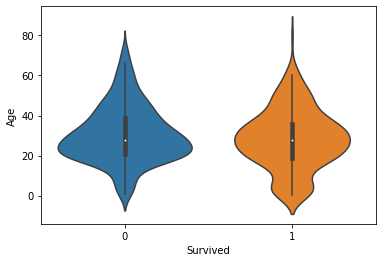

<IPython.core.display.Javascript object>

In [39]:
sns.violinplot(x="Survived", y="Age", data=ages)

In [42]:
stats.describe(lived["Age"])

DescribeResult(nobs=290, minmax=(0.42, 80.0), mean=28.343689655172415, variance=223.53096523207253, skewness=0.17952298982985943, kurtosis=-0.07723188107788648)

<IPython.core.display.Javascript object>

In [43]:
stats.describe(died["Age"])

DescribeResult(nobs=424, minmax=(1.0, 74.0), mean=30.62617924528302, variance=200.84869836968645, skewness=0.5835101027554267, kurtosis=0.2652058747777071)

<IPython.core.display.Javascript object>

In [45]:
# normal enough for testing.
t, p = stats.ttest_ind(lived["Age"], died["Age"])

<IPython.core.display.Javascript object>

In [46]:
p < 0.05

True

<IPython.core.display.Javascript object>

In [50]:
len(lived["Age"])

290

<IPython.core.display.Javascript object>

In [53]:
# looks l;ike a sig diff in age based on survival. Make a CI
def get_95_ci(data1, data2):
    mean1 = data1.mean()
    mean2 = data2.mean()
    v1 = data1.var()
    v2 = data2.var()
    n1 = len(data1)
    n2 = len(data2)

    signal = mean1 - mean2
    noise = np.sqrt(v1 / n1 + v2 / n2)

    c_upper = signal + 1.96 * noise
    c_lower = signal - 1.96 * noise

    return (c_upper, c_lower)

<IPython.core.display.Javascript object>

In [55]:
get_95_ci(lived["Age"], died["Age"])

(-0.0959725945838561, -4.469006585637352)

<IPython.core.display.Javascript object>

Is there a correlation between fare price and survival? Again, is this difference statistically important?

In [56]:
fares = titanic[["Fare", "Survived"]]

<IPython.core.display.Javascript object>

In [57]:
fares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Fare      891 non-null    float64
 1   Survived  891 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


<IPython.core.display.Javascript object>

In [59]:
f_lived = fares[fares["Survived"] == 1]
f_died = fares[fares["Survived"] == 0]

<IPython.core.display.Javascript object>

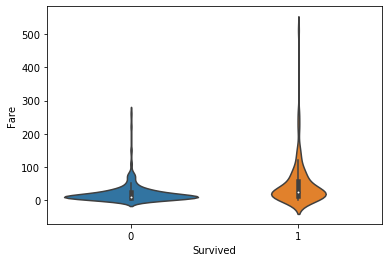

<IPython.core.display.Javascript object>

In [64]:
sns.violinplot(x="Survived", y="Fare", data=fares)

(array([421.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

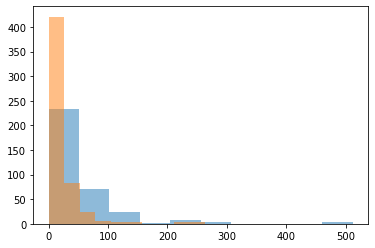

<IPython.core.display.Javascript object>

In [68]:
plt.hist(f_lived["Fare"], alpha=0.5)
plt.hist(f_died["Fare"], alpha=0.5)

In [61]:
stats.describe(f_lived["Fare"])

DescribeResult(nobs=342, minmax=(0.0, 512.3292), mean=48.39540760233918, variance=4435.160158368154, skewness=3.8458166819167294, kurtosis=20.343694359915972)

<IPython.core.display.Javascript object>

In [62]:
stats.describe(f_died["Fare"])

DescribeResult(nobs=549, minmax=(0.0, 263.0), mean=22.117886885245902, variance=985.2195092053387, skewness=4.540690741165962, kurtosis=26.12023942326097)

<IPython.core.display.Javascript object>